# CLUSTERING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# To enable plotly plot in Google Colab
# https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory/47230966
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
    
def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
configure_plotly_browser_state()
init_notebook_mode(connected=False)



In [5]:
data = pd.read_csv('/content/drive/My Drive/Applied AI/Datasets/New Donors/Preprocessed_inc_others.csv')
data.head()

Unnamed: 0 school_state  ... No of words in project title No of words in essay
0           0           ca  ...                            5                  175
1           1           ut  ...                            4                  179
2           2           ca  ...                            6                  116
3           3           ga  ...                            2                  127
4           4           wa  ...                            3                  114

[5 rows x 15 columns]

In [6]:
data.describe()

Unnamed: 0  ...  No of words in essay
count  109248.000000  ...         109248.000000
mean    54623.500000  ...            151.406369
std     31537.325441  ...             38.986772
min         0.000000  ...             76.000000
25%     27311.750000  ...            121.000000
50%     54623.500000  ...            141.000000
75%     81935.250000  ...            172.000000
max    109247.000000  ...            339.000000

[8 rows x 8 columns]

In [7]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(2)

Unnamed: 0 school_state  ... No of words in project title No of words in essay
0           0           ca  ...                            5                  175
1           1           ut  ...                            4                  179

[2 rows x 14 columns]

In [8]:
y = y.reshape(-1,1)
print(y.shape)

(109248, 1)


### Splitting the data

In [0]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [10]:
print(data_train.shape)
print(data_test.shape)
print(label_train.shape)
print(label_test.shape)

(73196, 14)
(36052, 14)
(73196, 1)
(36052, 1)


In [0]:
X_train = data_train
X_test = data_test
y_train = label_train
y_test = label_test

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73196, 14)
(36052, 14)
(73196, 1)
(36052, 1)


## 1.Vectorizing Features

### 1.1 School State

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_1 = CountVectorizer(list(X_train['school_state'].values), lowercase=False, binary=True)

In [0]:
X_train_Sstate = vectorizer_1.fit_transform(X_train['school_state'].values)
X_test_Sstate = vectorizer_1.transform(X_test['school_state'].values)

In [15]:
print(X_train_Sstate.shape)
print(X_test_Sstate.shape)

(73196, 51)
(36052, 51)


### 1.2 Clean Categories

In [0]:
vectorizer_2 = CountVectorizer(list(X_train['clean_categories'].values), lowercase=False, binary=True)

In [0]:
X_train_cat = vectorizer_2.fit_transform(X_train['clean_categories'].values)
X_test_cat = vectorizer_2.transform(X_test['clean_categories'].values)

In [18]:
print(X_train_cat.shape)
print(X_test_cat.shape)

(73196, 9)
(36052, 9)


### 1.3 Clean sub categories

In [0]:
vectorizer_3 = CountVectorizer(list(X_train['clean_subcategories'].values), lowercase=False, binary=True)

In [0]:
X_train_subcat = vectorizer_3.fit_transform(X_train['clean_subcategories'].values)
X_test_subcat = vectorizer_3.transform(X_test['clean_subcategories'].values)

In [21]:
print(X_train_subcat.shape)
print(X_test_subcat.shape)

(73196, 30)
(36052, 30)


### 1.4 Project Grade Category

In [0]:
vectorizer_4 = CountVectorizer(list(X_train['project_grade_category'].values), lowercase=False, binary=True)

In [0]:
X_train_grade = vectorizer_4.fit_transform(X_train['project_grade_category'].values)
X_test_grade = vectorizer_4.transform(X_test['project_grade_category'].values)

In [24]:
print(X_train_grade.shape)
print(X_test_grade.shape)

(73196, 4)
(36052, 4)


### 1.5 Teacher Prefix

In [0]:
vectorizer_5 = CountVectorizer(list(X_train['teacher_prefix'].values), lowercase=False, binary=True)

In [0]:
X_train_prefix = vectorizer_5.fit_transform(X_train['teacher_prefix'].values)
X_test_prefix = vectorizer_5.transform(X_test['teacher_prefix'].values)

In [27]:
print(X_train_prefix.shape)
print(X_test_prefix.shape)

(73196, 5)
(36052, 5)


### Step -1:
    - Choosing the 'TFIDF vectorizer' for Essay and Title Text

### 1.6 Essay

#### 1.6.1 TFIDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_7 = TfidfVectorizer(list(X_train['essay'].values), min_df=10)

In [0]:
X_train_essay_tfidf = vectorizer_7.fit_transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_7.transform(X_test['essay'].values)

In [78]:
print(X_train_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(73196, 14266)
(36052, 14266)


### 1.7 Title

#### 1.7.1 TFIDF 

In [0]:
vectorizer_9 = TfidfVectorizer(list(X_train['title'].values), min_df=10)

In [0]:
X_train_title_tfidf = vectorizer_9.fit_transform(X_train['title'].values)
X_test_title_tfidf = vectorizer_9.transform(X_test['title'].values)

In [33]:
print(X_train_title_tfidf.shape)
print(X_test_title_tfidf.shape)

(73196, 2617)
(36052, 2617)


### 1.8 Price

#### 1.8.1 Unstandardized

In [0]:
X_train_price_unstandardized = X_train['price'].values.reshape(-1,1)
X_test_price_unstandardized = X_test['price'].values.reshape(-1,1)

In [35]:
print(X_train_price_unstandardized.shape)
print(X_test_price_unstandardized.shape)

(73196, 1)
(36052, 1)


#### 1.8.2 Standardized

In [0]:
from sklearn.preprocessing import StandardScaler
sc_price = StandardScaler()
X_train_price = sc_price.fit_transform(X_train['price'].values.reshape(-1,1))
X_test_price = sc_price.transform(X_test['price'].values.reshape(-1,1))

In [37]:
print(X_train_price.shape)
print(X_test_price.shape)

(73196, 1)
(36052, 1)


### 1.9 Previously Posted projects

#### 1.9.1 Unstandardized

In [0]:
X_train_previous_unstandardized = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
X_test_previous_unstandardized = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

In [39]:
print(X_train_previous_unstandardized.shape)
print(X_test_previous_unstandardized.shape)

(73196, 1)
(36052, 1)


#### 1.9.2 Standardized

In [0]:
from sklearn.preprocessing import StandardScaler
sc_previous = StandardScaler()
X_train_previous = sc_previous.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous = sc_previous.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [0]:
print(X_train_previous.shape)
print(X_test_previous.shape)

In [42]:
print(X_train_Sstate.shape)
print(X_train_cat.shape)
print(X_train_subcat.shape)
print(X_train_grade.shape)
print(X_train_prefix.shape)
print(X_train_price.shape)
print(X_train_previous.shape)
print(X_train_essay_tfidf.shape)
print(X_train_title_tfidf.shape)

print('='*50)
print(X_test_Sstate.shape)
print(X_test_cat.shape)
print(X_test_subcat.shape)
print(X_test_grade.shape)
print(X_test_prefix.shape)
print(X_test_price.shape)
print(X_test_previous.shape)
print(X_test_essay_tfidf.shape)
print(X_test_title_tfidf.shape)


(73196, 51)
(73196, 9)
(73196, 30)
(73196, 4)
(73196, 5)
(73196, 1)
(73196, 1)
(73196, 14266)
(73196, 2617)
(36052, 51)
(36052, 9)
(36052, 30)
(36052, 4)
(36052, 5)
(36052, 1)
(36052, 1)
(36052, 14266)
(36052, 2617)


## Step -2 : Getting top 5000 features using selectKbest

### 2.1 Merging all the features

In [0]:
from scipy.sparse import hstack
X_train_KB = hstack((X_train_Sstate, X_train_cat, X_train_subcat, X_train_grade, X_train_prefix, X_train_previous_unstandardized, 
                       X_train_price_unstandardized, X_train_essay_tfidf, X_train_title_tfidf)).tocsr()

X_test_KB = hstack((X_test_Sstate, X_test_cat, X_test_subcat, X_test_grade, X_test_prefix, X_test_previous_unstandardized, 
                     X_test_price_unstandardized, X_test_essay_tfidf, X_test_title_tfidf)).tocsr()

In [0]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k =5000)
X_train = selector.fit_transform(X_train_KB, y_train)
X_test = selector.transform(X_test_KB)

In [81]:
print(X_train.shape)
print(X_test.shape)

(73196, 5000)
(36052, 5000)


# Step -3: Applying Clustering

## 3.1 K-Means

#### Note:
  - Since the KMeans algorithm is computationally Expensive i will take 30k points for computation

In [0]:
X_train_1 = X_train[0:30000, :]

In [0]:
y_train_1 = y_train[0:30000, :]

In [0]:
from sklearn.cluster import KMeans

### 3.1.1 Elbow Method

In [0]:
ss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_1)
    ss.append(kmeans.inertia_)

In [0]:
ss

[3664288500.6005983,
 1831370800.2786806,
 1111414794.3491583,
 660980249.8632902,
 448651448.41384536,
 345766077.6683432,
 259129655.58727992]

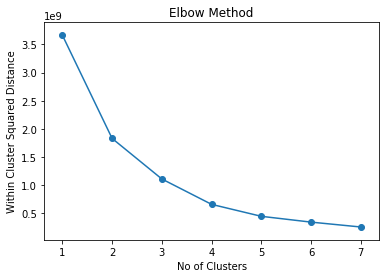

In [0]:
plt.plot(range(1,8), ss)
plt.scatter(range(1,8), ss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Within Cluster Squared Distance')
plt.show()

### Summary:
- It shows that the cluster distance have elbow shaped at No of clusters = 2

### 3.1.2 Modelling with n_clusters

In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_train_1)

### 3.1.3 Manually Looking at the clusters

In [0]:
print(y_kmeans)
print(y_kmeans.shape)

[0 1 0 ... 1 1 1]
(30000,)


In [0]:
y_kmeans = y_kmeans.reshape(-1,1)
print(y_kmeans.shape)
print(type(y_kmeans))
print(y_train_1.shape)
print(type(y_train_1))

(30000, 1)
<class 'numpy.ndarray'>
(30000, 1)
<class 'numpy.ndarray'>


In [0]:
#checking how many values are same in both the arrays
#https://stackoverflow.com/questions/25490641/check-how-many-elements-are-equal-in-two-numpy-arrays-python/25490691
(y_train_1 == y_kmeans).sum()

23795

#### Summary:
- We can see that the out of 30000 data 23795 data are clustered correctly.

In [0]:
print(np.where(kmeans.labels_ == 0)[0])
print(len(np.where(kmeans.labels_ == 0)[0]))

[    0     2    10 ... 29970 29986 29991]
3019


In [0]:
print(np.where(kmeans.labels_ == 1)[0])
print(len(np.where(kmeans.labels_ == 1)[0]))

[    1     3     4 ... 29997 29998 29999]
26981


In [0]:
# Data points belong the each cluster
#https://stackoverflow.com/questions/32232067/cluster-points-after-kmeans-clustering-scikit-learn
my_dict = {i : np.where(kmeans.labels_== i)[0] for i in range(kmeans.n_clusters)}

In [0]:
len(my_dict[0])

3019

In [0]:
len(my_dict[1])

26981

### Summary:
- It shows that out of 30k data points 26981 are clustered as one and remaining are clustered to form another

### 3.1.4 Plotting the Word Cloud for each cluster

In [0]:
X_train_essay_tfidf_1 = X_train_essay_tfidf[0:30000, :]
print(X_train_essay_tfidf_1.shape)

(30000, 14266)


In [0]:
#https://andrew47.github.io/scikitlearn-cluster.html
essay_kmeans = KMeans(n_clusters=2 , n_jobs=-1).fit(X_train_essay_tfidf_1)

In [0]:
centroids = pd.DataFrame(essay_kmeans.cluster_centers_)
centroids.columns = vectorizer_7.get_feature_names()
centroids.head(3)

00       000        03  ...   zooming      zoos     zumba
0  0.000104  0.000995  0.000000  ...  0.000000  0.000000  0.000000
1  0.000326  0.000845  0.000039  ...  0.000022  0.000053  0.000056

[2 rows x 14266 columns]

In [0]:
 #look at the top 10 words in each cluster
 for i in range(0, len(centroids)):
    print(centroids.iloc[i,:].sort_values(ascending=False)[0:10])
    print('='*50)

books       0.148911
reading     0.141218
students    0.134350
read        0.092631
book        0.056547
library     0.051495
school      0.046745
love        0.044425
readers     0.043976
my          0.042409
Name: 0, dtype: float64
students     0.128708
school       0.047591
learning     0.042019
classroom    0.039006
my           0.037525
they         0.032351
the          0.031454
learn        0.031333
help         0.030540
not          0.030237
Name: 1, dtype: float64


### Note:
- To plot the word cloud for each cluster, we need to find which words are belongs to which clusters. So, here we need to find which words belong cluster_0 and which words belongs to cluster_1.

In [0]:
pd.DataFrame(centroids.iloc[0].sort_values(ascending=False).reset_index(level=0)).head()

index         0
0     books  0.148911
1   reading  0.141218
2  students  0.134350
3      read  0.092631
4      book  0.056547

In [0]:
#https://andrew47.github.io/scikitlearn-cluster.html
cluster_0 = pd.DataFrame(centroids.iloc[0].sort_values(ascending=False).reset_index()) # here i reset index because words are in index and we want it as a column in dataframe
cluster_1 = pd.DataFrame(centroids.iloc[1].sort_values(ascending=False).reset_index())

In [0]:
cluster_0.head(2)

index         0
0    books  0.148911
1  reading  0.141218

In [0]:
cluster_0_words = []
for i in cluster_0['index']:
    cluster_0_words.append(i)

cluster_1_words = []
for i in cluster_1['index']:
    cluster_1_words.append(i)

#### 3.1.4.1 Cluster 0 word cloud

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words_0 = ' '
for word in cluster_0_words:
    comment_words_0 = comment_words_0 + word + ' '

In [0]:
#Generating Word Cloud for cluster_0_words
wordcloud_0_km = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words_0)

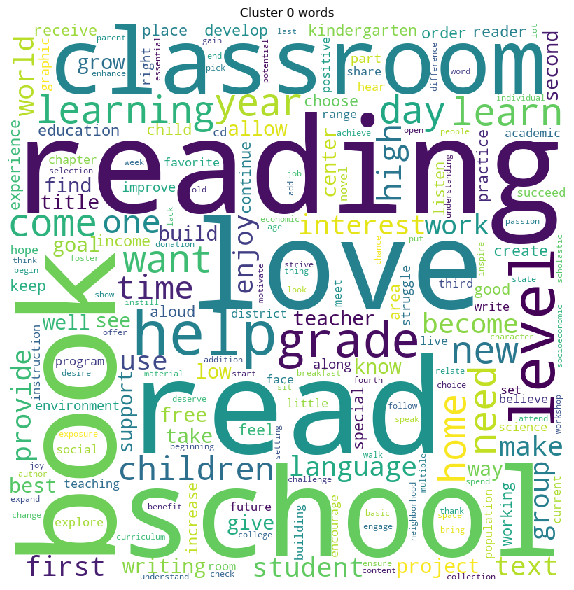

In [0]:
#plotting the Word Cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.title('Cluster 0 words')
plt.imshow(wordcloud_0_km)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 3.1.4.2 Cluster_1 word cloud

In [0]:
comment_words_1 = ' '
for word in cluster_1_words:
    comment_words_1 = comment_words_1 + word + ' '

In [0]:
#Generating Word Cloud for cluster_0_words
wordcloud_1_km = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words_1)

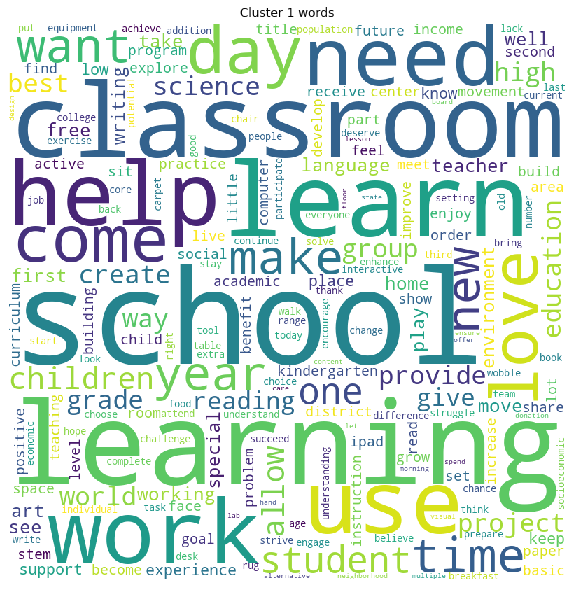

In [0]:
#plotting the Word Cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.title('Cluster 1 words')
plt.imshow(wordcloud_1_km)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 4. Hierarchical Clustering

In [0]:
# Taking only 5k points as per instructions
X_train_2 = X_train[0:5000, :]
X_test_2 = X_test[0:5000, :]
y_train_2 = y_train[0:5000, :]

In [0]:
print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)

(5000, 5000)
(5000, 5000)
(5000, 1)


### 4.1 Finding Dendrogram to find the number of clusters

In [0]:
type(X_train_2)

scipy.sparse.csr.csr_matrix

#### Note:
- Since it is a csr matrix we can't plot the dendrogram and we need to convert it into array as used in https://stackoverflow.com/questions/44660848/hierarchical-clustering-on-sparse-observation-matrix

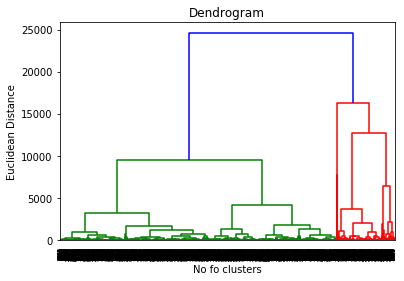

In [0]:
#https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_train_2.toarray(), method = 'ward')
dendrogram = dendrogram(linked)

plt.title('Dendrogram')
plt.xlabel('No fo clusters')
plt.ylabel('Euclidean Distance')
plt.show()

#### Summary:
- We can see that the number of longest vertical distance without any horizontal intersection in this dendrogram is 2. So we take the n_clusters = 2

### 4.2 Modelling with n_clusters

In [0]:
n_clusters = 2

In [0]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = n_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_train_2.toarray())

### 4.3 Manually looking at the clusters

In [0]:
y_hc.shape

(5000,)

In [0]:
y_hc = y_hc.reshape(-1,1)
print(y_hc.shape)
print(type(y_hc))
print(y_train_2.shape)
print(type(y_train))

(5000, 1)
<class 'numpy.ndarray'>
(5000, 1)
<class 'numpy.ndarray'>


In [0]:
#checking how many values are same in both the arrays
#https://stackoverflow.com/questions/25490641/check-how-many-elements-are-equal-in-two-numpy-arrays-python/25490691
(y_train_2 == y_hc).sum()

3720

#### Note:
- We can see that out of 5000 , 3720 are clustered correctly

In [0]:
# Data points belong the each cluster
#https://stackoverflow.com/questions/32232067/cluster-points-after-kmeans-clustering-scikit-learn
my_dict_2 = {i : np.where(hc.labels_== i)[0] for i in range(hc.n_clusters)}

In [0]:
len(my_dict_2[0])

858

In [0]:
len(my_dict_2[1])

4142

### Summary:
- We can see that 858 points are clustered into one cluster and remaining 4142 cluster clustered to form another

### 4.4 Finding words for Essay text on each cluster

In [0]:
X_train_essay_tfidf_2 = X_train_essay_tfidf[0:5000, :]
print(X_train_essay_tfidf_2.shape)

(5000, 14266)


In [0]:
#https://andrew47.github.io/scikitlearn-cluster.html
from sklearn.cluster import AgglomerativeClustering
essay_hc = AgglomerativeClustering(n_clusters = n_clusters, linkage='ward', affinity='euclidean').fit(X_train_essay_tfidf_2.toarray())

In [0]:
cluster_0_hc =  X_train_essay_tfidf_2[np.where(essay_hc.labels_ ==0)]

In [0]:
cluster_1_hc =  X_train_essay_tfidf_2[np.where(essay_hc.labels_ ==1)]

In [0]:
print(cluster_0_hc.shape)
print(cluster_1_hc.shape)

(4446, 14266)
(554, 14266)


### Note:
- We can see that the out of 5k points 4446 points are clustered into one category and remaining 554 are clustered into another

In [0]:
type(cluster_0_hc)

scipy.sparse.csr.csr_matrix

In [0]:
#convert csr matrix to dataframe
cluster_0_hc = pd.DataFrame(cluster_0_hc.toarray(), columns=vectorizer_7.get_feature_names())
cluster_0_hc.head(2)

00  000   03   10  100  1000  ...  zoob  zoology  zoom  zooming  zoos  zumba
0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0      0.0   0.0      0.0   0.0    0.0
1  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0      0.0   0.0      0.0   0.0    0.0

[2 rows x 14266 columns]

In [0]:
cluster_1_hc = pd.DataFrame(cluster_1_hc.toarray(), columns=vectorizer_7.get_feature_names())
cluster_1_hc.head(2)

00  000   03   10  100  1000  ...  zoob  zoology  zoom  zooming  zoos  zumba
0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0      0.0   0.0      0.0   0.0    0.0
1  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0      0.0   0.0      0.0   0.0    0.0

[2 rows x 14266 columns]

In [0]:
#looking at the sample data point and its essay words
cluster_0_hc.iloc[0,:].sort_values(ascending=False)[0:10].reset_index()

index         0
0         avid  0.281376
1  chromebooks  0.279620
2      college  0.179109
3    computers  0.178794
4       pulled  0.166316
5           we  0.162115
6         bond  0.161101
7        paced  0.148754
8       skills  0.147422
9     students  0.142786

In [0]:
yyy = []
for i in range(0, cluster_1_hc.shape[0]):
    j = cluster_1_hc.iloc[i, :].sort_values(ascending=False).reset_index()
    yyy.append(j['index'].tolist())
      

In [0]:
#making cluster_1_words as a one flat list
cluster_1_words = []
for sublist in yyy:
    for item in sublist:
        cluster_1_words.append(item)

In [0]:
zzz = []
for i in range(0, cluster_0_hc.shape[0]):
    j = cluster_0_hc.iloc[i, :].sort_values(ascending=False).reset_index()
    zzz.append(j['index'].tolist())
      

In [0]:
#making cluster_1_words as a one flat list
cluster_0_words = []
for sublist in zzz:
    for item in sublist:
        cluster_0_words.append(item)

In [0]:
#to get the unique words in the list
cluster_0_words = list(set(cluster_0_words))
cluster_1_words = list(set(cluster_1_words))

In [0]:
print(len(cluster_0_words))
print(len(cluster_1_words))

14266
14266


### 4.6 Plotting word cloud

#### 4.6.1 Cluster 0 words

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words_0 = ' '
for word in cluster_0_words:
    comment_words_0 = comment_words_0 + word + ' '

In [0]:
#Generating Word Cloud for cluster_0_words

wordcloud_0_hc = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words_0)

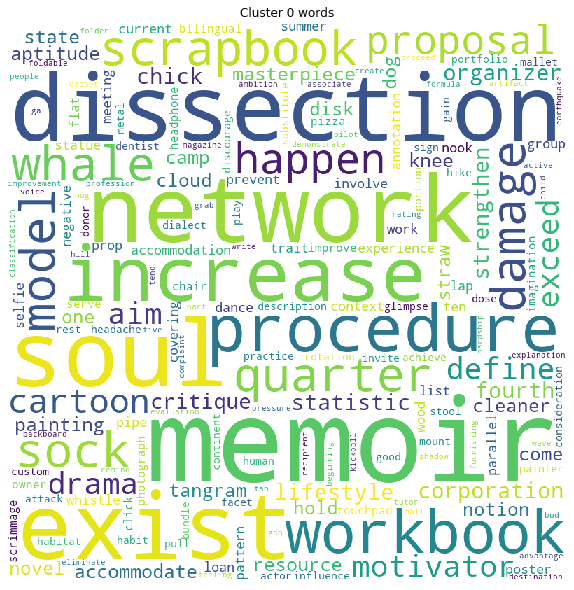

In [0]:
#plotting the Word Cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.title('Cluster 0 words')
plt.imshow(wordcloud_0_hc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 4.6.2 Cluster 1 words

In [0]:
comment_words_1 = ' '
for word in cluster_1_words:
    comment_words_1 = comment_words_1 + word + ' '

In [0]:
#Generating Word Cloud for cluster_0_words
wordcloud_1_hc = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words_1)

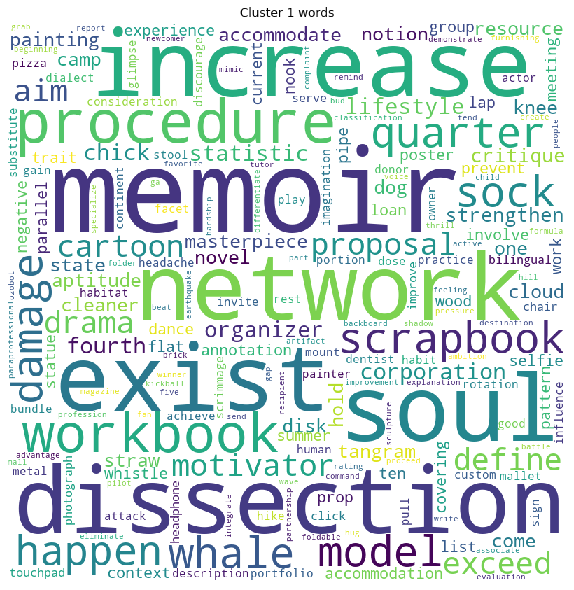

In [0]:
#plotting the Word Cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.title('Cluster 1 words')
plt.imshow(wordcloud_1_hc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# 5. DBSCAN 

In [0]:
from sklearn.cluster import DBSCAN

In [45]:
X_train.shape

(73196, 14)

In [53]:
X_train_3 = X_train[0:15000, :]
y_train_3 = y_train[0:15000, :]
print(X_train_3.shape)
print(y_train_3.shape)

(15000, 5000)
(15000, 1)


### 5.1 Elbow method to find eps

#### Note:
- As dimension is 5000 and the min_pts should be around 2*d. So, i am going to take min_pts as 10000

In [54]:
# Finding nearest neighbour distance from min_pts 
#to get the 100 nearest neighbor of each data points we should train with the method mentioned in link below
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
min_pts = 10000
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=min_pts, algorithm='auto', n_jobs=-1)
neigh.fit(X_train_3)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=-1, n_neighbors=10000, p=2,
                 radius=1.0)

#### Note:
- Once we got the nearest neighbors with the n_neighbors=min_pts , we should do with "neigh.kneighbors" to get the 10000 neighbor distance from each points as it returns the tuple of (distances, index of points) and we need only the first item in tuple and from that first item, the 100th column represents the distance from the point to 10000th neighbor 
as mentioned in https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

In [55]:
# as mentioned above the neigh.kneighbors returns the tuple of (distance of 10000 neighbors, index of data points)
neigh.kneighbors(X_train_3)

(array([[  0.        ,   4.26118444,   5.09211808, ..., 612.23987853,
         612.2467039 , 612.26383596],
        [  0.        ,   2.66705629,   2.91805014, ..., 307.63432143,
         307.63561732, 307.67179708],
        [  0.        ,   2.3686349 ,   2.4646736 , ..., 520.59357963,
         520.63979871, 520.64468002],
        ...,
        [  0.        ,   2.34817695,   2.44119171, ..., 233.88279146,
         233.89206397, 233.89741496],
        [  0.        ,   3.61697841,   4.82789578, ..., 522.66264938,
         522.66591022, 522.6774651 ],
        [  0.        ,   2.66831236,   2.6923055 , ..., 305.78602823,
         306.04776049, 306.0602724 ]]),
 array([[    0, 10087,  4199, ..., 12580,  1686,  9280],
        [    1,  1283,  6856, ..., 12517,  2003,  8707],
        [    2,  2984,  8155, ..., 12745, 11808,  1107],
        ...,
        [14997, 13364,  5756, ..., 11658,  6859,  7403],
        [14998,  2551,  7392, ...,  2876,  2268,   120],
        [14999,  7160,  7743, ...,   10

In [56]:
distance = pd.DataFrame(neigh.kneighbors(X_train_3)[0])
distance.head(5)

0         1         2     ...        9997        9998        9999
0   0.0  4.261184  5.092118  ...  612.239879  612.246704  612.263836
1   0.0  2.667056  2.918050  ...  307.634321  307.635617  307.671797
2   0.0  2.368635  2.464674  ...  520.593580  520.639799  520.644680
3   0.0  2.846323  2.911831  ...  175.076661  175.096393  175.110670
4   0.0  2.318865  2.708542  ...  273.119168  273.172913  273.223647

[5 rows x 10000 columns]

#### Note:
- Since we need the 10000th neighbor distance, so we need only 10000th column

In [0]:
distance  = distance[9999]

In [58]:
distance

0        612.263836
1        307.671797
2        520.644680
3        175.110670
4        273.223647
            ...    
14995    279.192288
14996    291.540325
14997    233.897415
14998    522.677465
14999    306.060272
Name: 9999, Length: 15000, dtype: float64

In [59]:
pd.DataFrame(distance).describe()

9999
count  15000.000000
mean     311.261241
std      286.690325
min      157.852610
25%      190.148375
50%      238.259953
75%      303.531436
max     9859.842924

In [0]:
#Sort the distance in ascending order
distance = distance.sort_values(ascending=True)

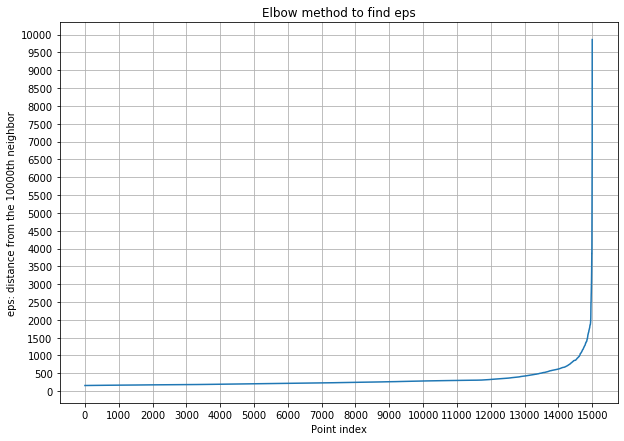

In [66]:
plt.figure(figsize=(10,7))
plt.plot(range(1,15001), distance)

plt.yticks(range(0,10001,500))
plt.xticks(range(0,15001, 1000))
plt.title('Elbow method to find eps')
#plt.margins(x=0, y=-0.25)
plt.xlabel('Point index')
plt.ylabel('eps: distance from the 10000th neighbor')
plt.grid()
plt.show()

### Note:
- It shows that the distance point around 14500 the distances start to increase over 1000 and it increases rapidly. So the distance should be taken as 1000

### 5.2 Modelling with parameters

In [0]:
dbscan = DBSCAN(eps = 1000 , min_samples=10000)
y_dbscan = dbscan.fit_predict(X_train_3)

In [68]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
y_dbscan = y_dbscan.reshape(-1,1)
print(y_dbscan.shape)

(15000, 1)


In [70]:
(y_dbscan == y_train_3).sum()

2301

#### Summary:
- It shows that our model only clustered only 2301 correctly

### 5.3 Finding words for Essay text on each cluster

In [82]:
X_train_essay_tfidf_3 = X_train_essay_tfidf[0:15000, :]
print(X_train_essay_tfidf_3.shape)

(15000, 14266)


In [0]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 1000 , min_samples=10000)

In [0]:
essay_db = dbscan.fit(X_train_essay_tfidf_3)

In [85]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
np.unique(dbscan.labels_)

array([0])

## Note:
- It shows that DBSCAN plot all the points in one single cluster.

In [0]:
cluster_0_db =  X_train_essay_tfidf_3[np.where(essay_db.labels_ ==0)]

In [0]:
#cluster_1_db =  X_train_essay_tfidf_3[np.where(essay_db.labels_ ==1)]

In [113]:
print(cluster_0_db.shape)
#print(cluster_1_db.shape)

(15000, 14266)


In [0]:
type(cluster_0_hc)

pandas.core.frame.DataFrame

In [91]:
#convert csr matrix to dataframe
cluster_0_db = pd.DataFrame(cluster_0_db.toarray(), columns=vectorizer_7.get_feature_names())
cluster_0_db.head(2)

00  000   03   10  100  1000  ...  zoob  zoology  zoom  zooming  zoos  zumba
0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0      0.0   0.0      0.0   0.0    0.0
1  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0      0.0   0.0      0.0   0.0    0.0

[2 rows x 14266 columns]

In [0]:
#cluster_1_db = pd.DataFrame(cluster_1_db.toarray(), columns=vectorizer_7.get_feature_names())
#cluster_1_db.head(2)

In [93]:
#looking at the sample data point and its essay words
cluster_0_db.iloc[0,:].sort_values(ascending=False).reset_index()

index         0
0             avid  0.281376
1      chromebooks  0.279620
2          college  0.179109
3        computers  0.178794
4           pulled  0.166316
...            ...       ...
14261      plugged  0.000000
14262         plug  0.000000
14263         pltw  0.000000
14264        plots  0.000000
14265           00  0.000000

[14266 rows x 2 columns]

In [0]:
#www = []
#for i in range(0, cluster_1_db.shape[0]):
#    j = cluster_1_db.iloc[i, :].sort_values(ascending=False).reset_index()
#   www.append(j['index'].tolist())
      

In [0]:
#making cluster_1_words as a one flat list
#cluster_1_words = []
#for sublist in www:
#    for item in sublist:
#        cluster_1_words.append(item)

In [0]:
xxx = []
for i in range(0, cluster_0_db.shape[0]):
    j = cluster_0_db.iloc[i, :].sort_values(ascending=False).reset_index()
    xxx.append(j['index'].tolist())
      

In [0]:
#making cluster_1_words as a one flat list
cluster_0_words = []
for sublist in xxx:
    for item in sublist:
        cluster_0_words.append(item)

In [0]:
#to get the unique words in the list
cluster_0_words = list(set(cluster_0_words))
#cluster_1_words = list(set(cluster_1_words))

### 5.4 Plotting word cloud

#### 5.4.1 Cluster 0 words

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words_0_db = ' '
for word in cluster_0_words:
    comment_words_0_db = comment_words_0_db + word + ' '

In [0]:
#Generating Word Cloud for cluster_0_words

wordcloud_0_db = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words_0_db)

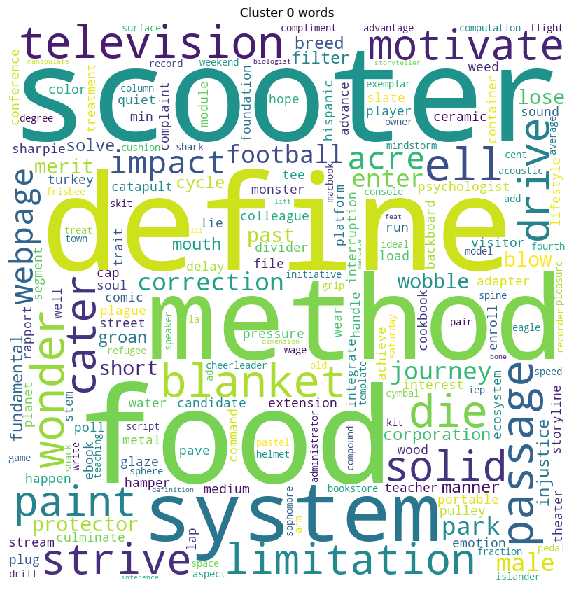

In [110]:
#plotting the Word Cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.title('Cluster 0 words')
plt.imshow(wordcloud_0_db)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 5.4.2 Cluster 1 words

In [0]:
#comment_words_1_db = ' '
#for word in cluster_1_words:
#    comment_words_1_db = comment_words_1 + word + ' '

In [0]:
#Generating Word Cloud for cluster_0_words
#wordcloud_1_db = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words_1_db)

In [0]:
#plotting the Word Cloud
#plt.figure(figsize=(8,8), facecolor=None)
#plt.imshow(wordcloud_1_db)
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

# Summary:

In [117]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ['Model Number', 'Vectorizer', 'Model', 'Hyperparameter: n_clusters']
x.add_row(['1', 'TFIDF', 'K-Means', str(2)])
x.add_row(['2', 'TFIDF', 'Hierarchical', str(2)])
x.add_row(['3', 'TFIDF', 'DBSCAN', str(1)])

print(x)

+--------------+------------+--------------+----------------------------+
| Model Number | Vectorizer |    Model     | Hyperparameter: n_clusters |
+--------------+------------+--------------+----------------------------+
|      1       |   TFIDF    |   K-Means    |             2              |
|      2       |   TFIDF    | Hierarchical |             2              |
|      3       |   TFIDF    |    DBSCAN    |             1              |
+--------------+------------+--------------+----------------------------+


# That's the end of the code